In [1]:
%matplotlib inline

In [2]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os

/Users/kaniska/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Local data directories
train_dir = 'data/dogs-vs-cats-small/train'
test_dir = 'data/dogs-vs-cats-small/test'
validation_dir = 'data/dogs-vs-cats-small/validation'

### Image Augmentation

In [4]:
datagen = image.ImageDataGenerator(rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  fill_mode='nearest',
                                  horizontal_flip=True,
                                  data_format='channels_last')

In [5]:
# Filenames from training directory
file_idx = 100
train_cat_files = [ os.path.join(train_dir, 'cats', fname) for fname in os.listdir(os.path.join( train_dir, 'cats')) ]
img = image.load_img(train_cat_files[file_idx], target_size=(150, 150))
img_array = image.img_to_array(img)
print('Array shape: {0}.'.format(img_array.shape))

print('ImageDataGenerator.flow() needs shape to be in format (samples, height, width, channel).')
img_array = img_array.reshape((1,) + img_array.shape)
print('New array shape: {0}.'.format(img_array.shape))

Array shape: (150, 150, 3).
ImageDataGenerator.flow() needs shape to be in format (samples, height, width, channel).
New array shape: (1, 150, 150, 3).


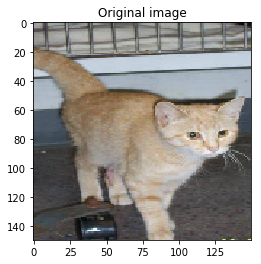

In [6]:
plt.figure()
plt.imshow(image.array_to_img(img_array[0]))
plt.title('Original image')
plt.show()

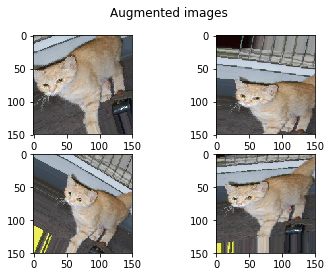

In [7]:
count = 1
fig = plt.figure()
for augmented_batch in datagen.flow(img_array, batch_size=1):
    ax = fig.add_subplot(2, 2, count)
    ax.imshow(image.array_to_img(augmented_batch[0]))
    count += 1
    if count % 5 == 0:
        break
plt.suptitle('Augmented images')
plt.show()